<a href="https://colab.research.google.com/github/Upendra4204/Upendra4204/blob/main/boston_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload=files.upload()

Saving boston_HP.csv to boston_HP.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('boston_HP.csv')
df=pd.DataFrame(data)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df=df.drop_duplicates()
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [5]:
cat_cols=df.select_dtypes(include='object')
num_cols=df.select_dtypes(exclude='object')

In [6]:
cat_cols=cat_cols.drop(['Alley','MiscFeature','Fence','PoolQC','FireplaceQu','Neighborhood','Exterior1st','Exterior2nd'],axis=1)
for col in cat_cols:
           cat_cols[col].fillna(cat_cols[col].mode()[0],inplace=True)
cat_cols.isnull().any()

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
SaleType         False
SaleCondition    False
dtype: bool

In [7]:
num_cols=num_cols.drop(['Id'],axis=1)
for col in num_cols:
           num_cols[col].fillna(num_cols[col].median(),inplace=True)
num_cols.isnull().any()

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [8]:
df=pd.concat([cat_cols,num_cols],axis=1)

In [9]:
q1=num_cols.quantile(0.15)
q3=num_cols.quantile(0.85)

outlier_mask=((num_cols<q1)|(num_cols>q3)).any(axis=1)
new_df=df[~outlier_mask]
new_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,42,0,0,0,0,0,9,2008,223500
19,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,0,5,2009,139000
132,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,0,7,2007,150750
160,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,0,6,2008,162500
186,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,...,168,27,0,0,0,0,0,6,2009,173000
192,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,35,0,0,0,0,0,9,2009,192000
209,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,0,7,2008,145000
248,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,144,68,0,0,0,0,0,9,2007,180000
327,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,45,0,0,0,0,0,4,2006,145250
331,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,0,8,2007,139000


In [10]:
new_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.0,...,43.000000,43.000000,43.0,43.0,43.0,43.0,43.0,43.000000,43.000000,43.000000
mean,41.511628,69.767442,9301.302326,5.883721,5.488372,1979.767442,1983.744186,49.44186,490.069767,0.0,...,46.162791,31.604651,0.0,0.0,0.0,0.0,0.0,6.697674,2007.558140,160231.395349
std,24.556419,6.054661,1371.087117,0.878562,0.668050,18.929490,18.386192,71.91407,289.561195,0.0,...,73.937532,30.002492,0.0,0.0,0.0,0.0,0.0,1.655221,1.160918,24795.489757
min,20.000000,57.000000,6993.000000,5.000000,5.000000,1956.000000,1956.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000,2006.000000,126000.000000
25%,20.000000,66.000000,8097.500000,5.000000,5.000000,1961.000000,1963.500000,0.00000,392.500000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.500000,2007.000000,139000.000000
50%,20.000000,69.000000,9084.000000,6.000000,5.000000,1977.000000,1992.000000,0.00000,560.000000,0.0,...,0.000000,35.000000,0.0,0.0,0.0,0.0,0.0,7.000000,2007.000000,156000.000000
75%,60.000000,73.500000,10172.500000,7.000000,6.000000,1999.000000,2001.000000,103.50000,722.500000,0.0,...,100.000000,59.500000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,179500.000000
max,90.000000,80.000000,12095.000000,8.000000,7.000000,2005.000000,2006.000000,260.00000,846.000000,0.0,...,212.000000,88.000000,0.0,0.0,0.0,0.0,0.0,10.000000,2009.000000,223500.000000


In [11]:
categorical_cols=new_df.select_dtypes(include='object')
numerical_cols=new_df.select_dtypes(exclude='object')

<Axes: >

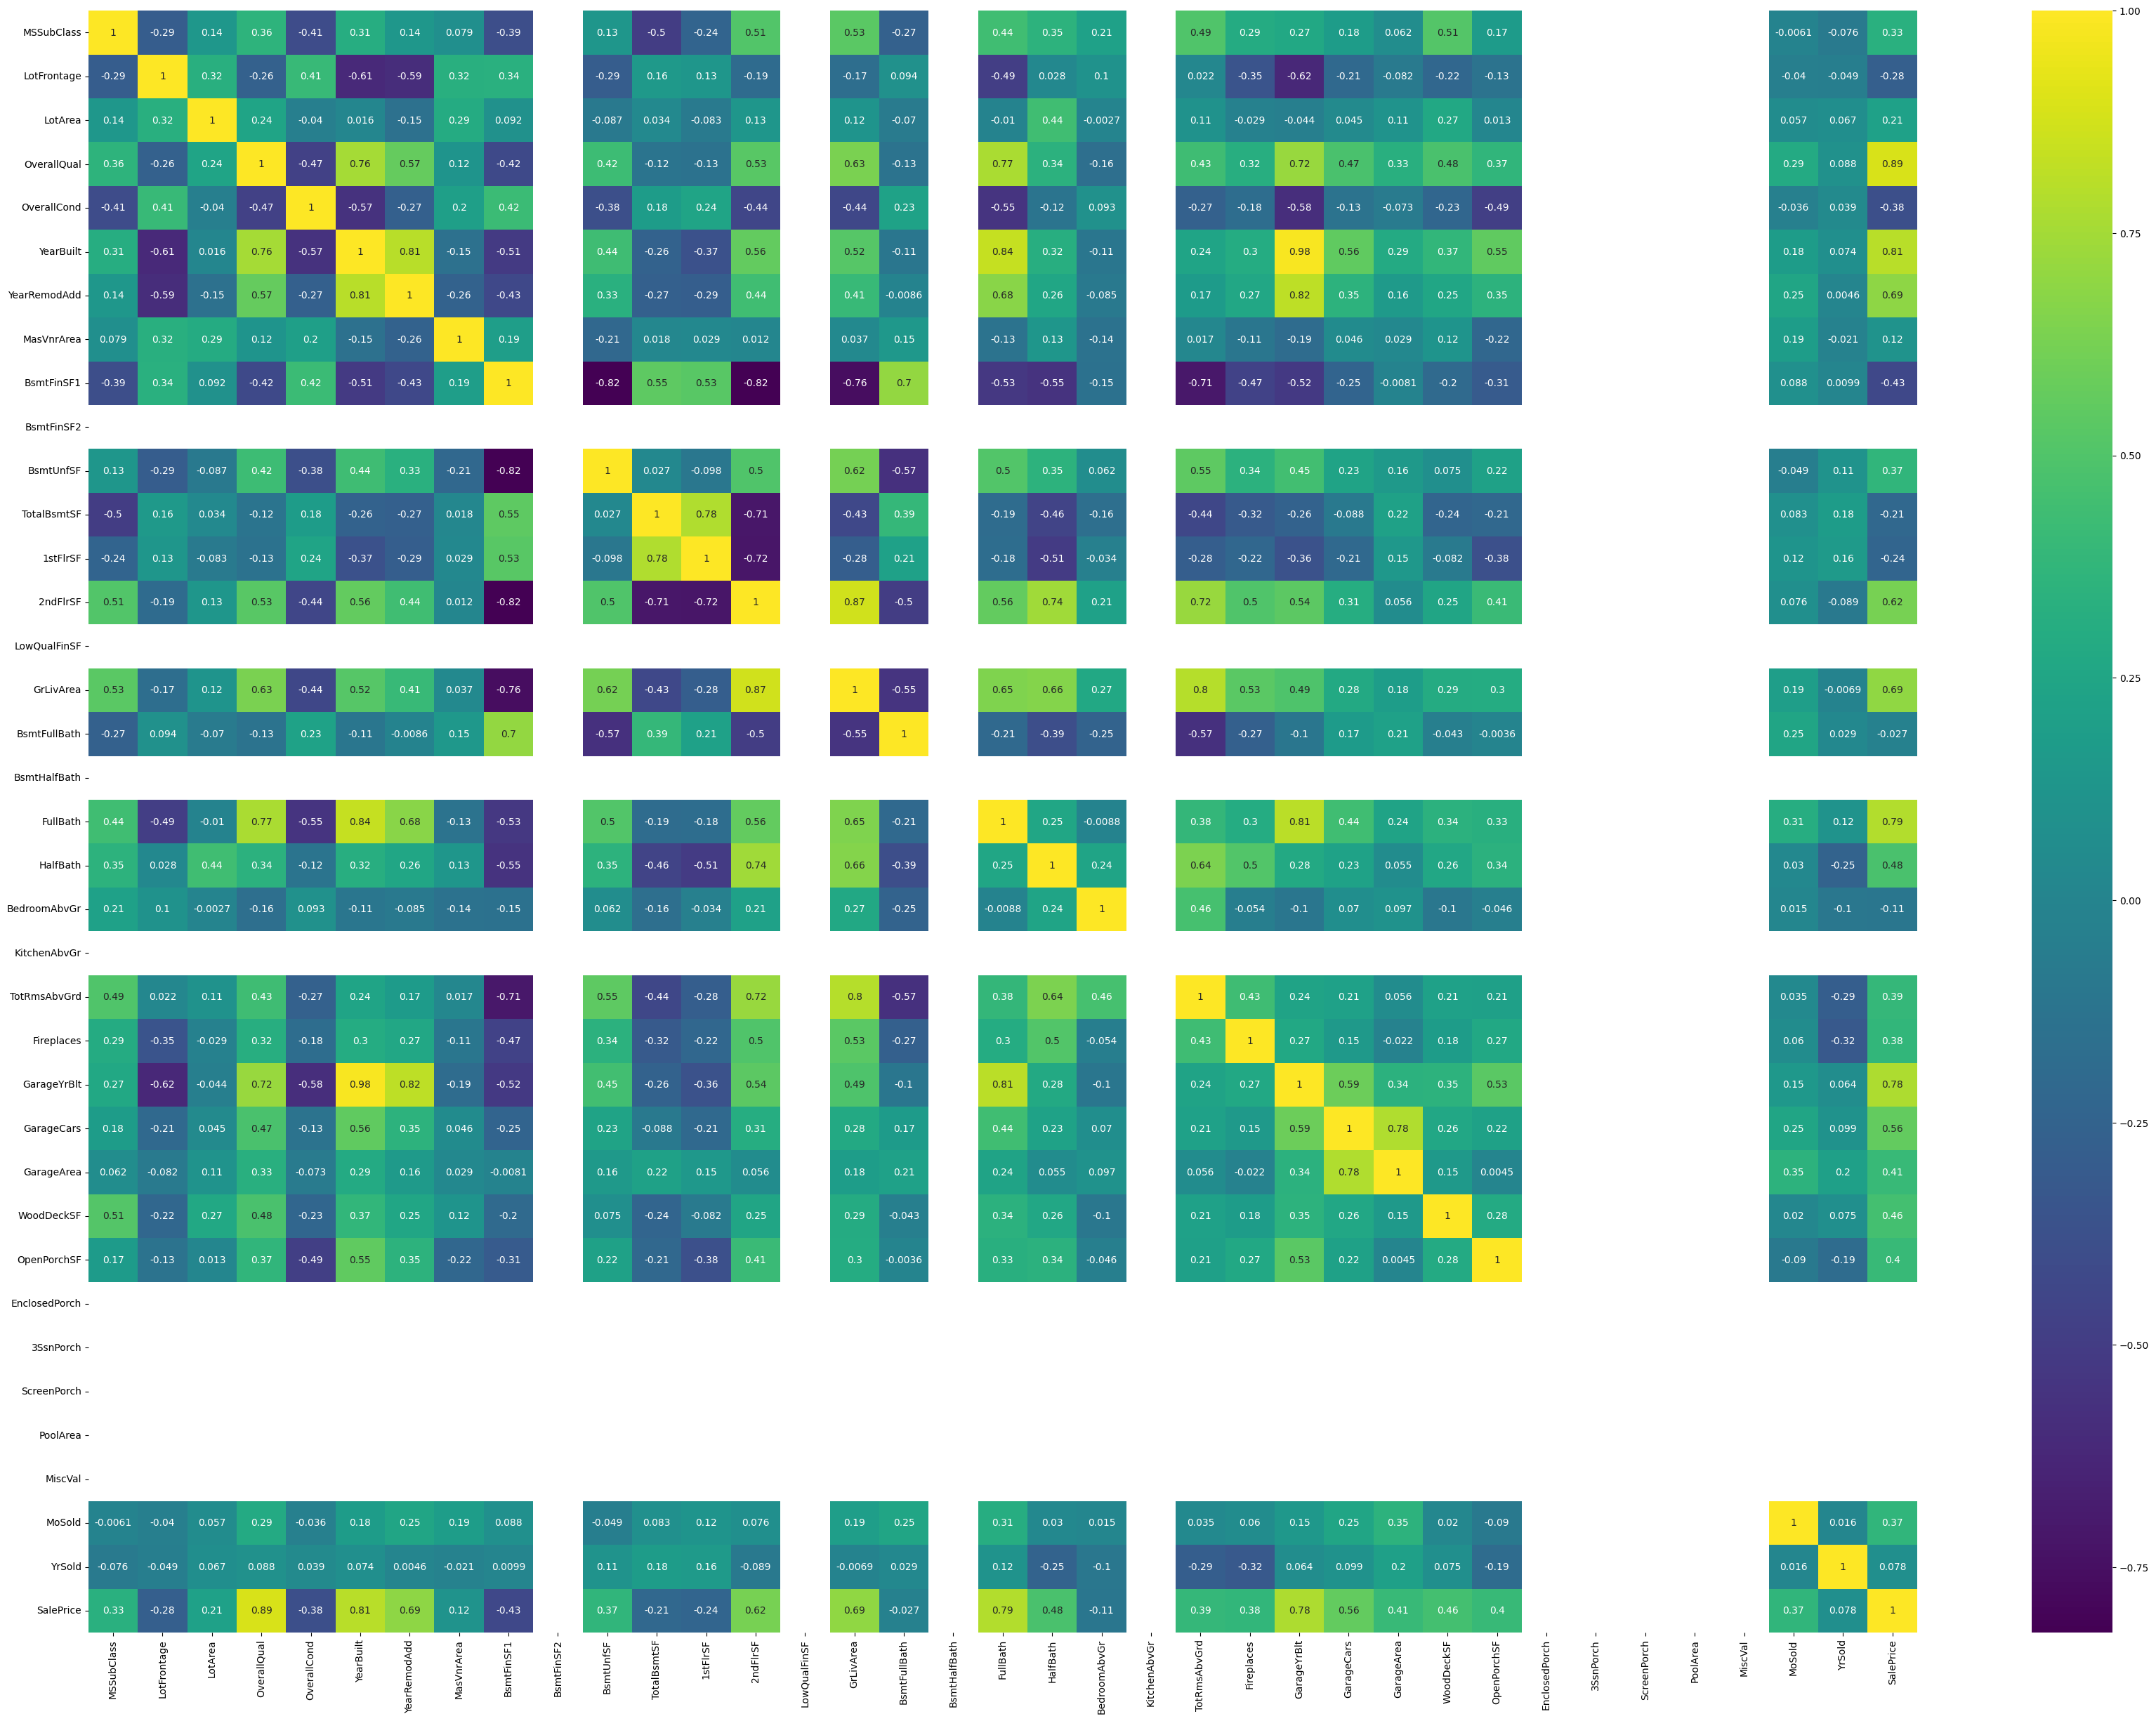

In [12]:
new_col1=pd.get_dummies(categorical_cols)
corr_matrix=numerical_cols.corr()
plt.figure(figsize=(42,30))
sns.heatmap(corr_matrix,annot=True,cmap='viridis')

In [13]:
numerical_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
new_cols=numerical_cols.drop(['LowQualFinSF', 'BsmtHalfBath','KitchenAbvGr','3SsnPorch',
                     'ScreenPorch','PoolArea','MiscVal','EnclosedPorch','BedroomAbvGr',
                     'BsmtFinSF2','YrSold','OverallCond','1stFlrSF'],axis=1)
new_cols

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice
2,60,68.0,11250,7,2001,2002,162.0,486,434,920,...,1,6,1,2001.0,2,608,0,42,9,223500
19,20,70.0,7560,5,1958,1965,0.0,504,525,1029,...,0,6,0,1958.0,1,294,0,0,5,139000
132,20,75.0,7388,5,1959,2002,0.0,405,658,1063,...,0,7,0,1974.0,2,624,0,0,7,150750
160,20,69.0,11120,6,1984,1984,0.0,660,572,1232,...,0,6,0,1984.0,2,516,0,0,6,162500
186,80,69.0,9947,7,1990,1991,0.0,611,577,1188,...,0,6,0,1990.0,2,497,168,27,6,173000
192,20,68.0,9017,7,1999,1999,0.0,560,871,1431,...,0,6,0,1999.0,2,666,0,35,9,192000
209,20,75.0,8250,6,1964,1964,260.0,787,305,1092,...,0,6,0,1964.0,2,504,0,0,7,145000
248,60,72.0,11317,7,2003,2003,101.0,0,840,840,...,1,8,0,2003.0,2,500,144,68,9,180000
327,20,80.0,11600,6,1960,1960,175.0,565,818,1383,...,1,7,0,1960.0,1,292,0,45,4,145250
331,20,70.0,8176,5,1958,1992,0.0,846,210,1056,...,0,6,0,1958.0,1,308,0,0,8,139000


In [15]:
df=pd.concat([new_col1,new_cols],axis=1)
df

,MSZoning_RL,Street_Pave,LotShape_IR1,LotShape_Reg,LandContour_HLS,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,...,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice
2,1,1,1,0,0,1,1,0,0,1,...,1,6,1,2001.0,2,608,0,42,9,223500
19,1,1,0,1,0,1,1,0,0,1,...,0,6,0,1958.0,1,294,0,0,5,139000
132,1,1,0,1,0,1,1,1,0,0,...,0,7,0,1974.0,2,624,0,0,7,150750
160,1,1,1,0,0,1,1,0,1,0,...,0,6,0,1984.0,2,516,0,0,6,162500
186,1,1,1,0,0,1,1,0,1,0,...,0,6,0,1990.0,2,497,168,27,6,173000
192,1,1,1,0,0,1,1,0,0,1,...,0,6,0,1999.0,2,666,0,35,9,192000
209,1,1,0,1,0,1,1,0,0,1,...,0,6,0,1964.0,2,504,0,0,7,145000
248,1,1,0,1,0,1,1,0,0,1,...,1,8,0,2003.0,2,500,144,68,9,180000
327,1,1,0,1,0,1,1,0,0,1,...,1,7,0,1960.0,1,292,0,45,4,145250
331,1,1,0,1,0,1,1,0,0,1,...,0,6,0,1958.0,1,308,0,0,8,139000


In [16]:
X=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

X=np.log1p(X)



from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled.shape

(43, 101)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

from sklearn.decomposition import PCA
pca=PCA(0.90)
X_pca=pca.fit_transform(X_scaled)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
r2=r2_score(y_test,y_pred_rf)
r2

0.9443868684756278

In [19]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_train)
r2=r2_score(y_train,y_pred_rf)
r2

0.9497279732331199

In [20]:
from sklearn.decomposition import PCA
pca=PCA(0.90)
X_pca=pca.fit_transform(X_scaled)
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
r2=r2_score(y_test,y_pred_rf)
r2

0.8986889559012814

In [21]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test,y_pred_rf)
rmse

45214781.277777776

In [24]:

from sklearn.model_selection import cross_val_score, KFold

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(rf, X_pca, y, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')

Cross-Validation Results (Accuracy): [0.87782865 0.73750327 0.83353101 0.85297547 0.62783702]
